In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
%matplotlib inline
data= pd.read_csv("C:/Users/trinity/Downloads/titanic/train.csv")
data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
import seaborn as sns
sns.boxplot(x=boston_df['DIS'])

In [51]:
#Male is 0 and female is 1
data.Sex= data.Sex.str.replace('male','0')
data.Sex= data.Sex.str.replace('fe0','1')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [226]:
#data.groupby("Survived").Age.mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [227]:
#data["Age"][(data["Age"].isnull()) & (data["Survived"]==0)]= 30.62
#data["Age"][(data["Age"].isnull()) & (data["Survived"]==1)]= 28.34

C:\Users\trinity\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\trinity\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
data1=data[["Age","Pclass","Sex","Parch","SibSp"]]
data1=pd.get_dummies(data1)
known_age= data1[data1.Age.notnull()].as_matrix()
unknown_age=data1[data1.Age.isnull()].as_matrix()
y=known_age[:,0]
X=known_age[:,1:]

C:\Users\trinity\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\trinity\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
rfr = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
rfr.fit(X,y)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [55]:
predictages=rfr.predict(unknown_age[:,1::])
data.loc[(data.Age.isnull()),'Age'] = predictages


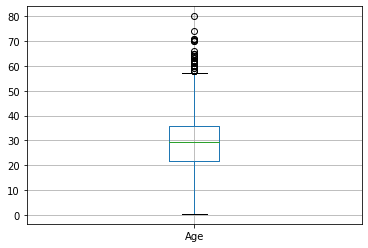

In [56]:
data.boxplot("Age")

In [66]:
outliers=[]
def detect_outlier(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    for i in data:
        Zscore=(i-mean)/std
        if np.abs(Zscore)>threshold:
            outliers.append(i)
    return outliers        

In [67]:
outliersAge= detect_outlier(data.Age)
outliersAge


[71.0, 70.5, 71.0, 80.0, 74.0]

In [48]:
data["Age"].describe()

count    891.000000
mean      29.545038
std       13.531036
min        0.420000
25%       21.675430
50%       29.235196
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Embarked with null values
data[data["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


In [9]:
data['Ticket_num'] =data['Ticket'].map(lambda x: re.sub("\D", "", x))
data['Ticket_num'] = pd.to_numeric(data['Ticket_num'])
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_num
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,521171.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,17599.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,23101282.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,113803.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,373450.0


In [10]:
data1= data[(data['Parch']==0)&(data['SibSp']==0)&(data['Ticket_num']<114000)&(data['Ticket_num']>113500)]
data1.sort_values('Ticket_num').head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_num
782,783,0,1,"Long, Mr. Milton Clyde",0,29.000000,0,0,113501,30.00,D6,S,113501.0
351,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",0,44.802075,0,0,113510,35.00,C128,S,113510.0
252,253,0,1,"Stead, Mr. William Thomas",0,62.000000,0,0,113514,26.55,C87,S,113514.0
61,62,1,1,"Icard, Miss. Amelie",1,38.000000,0,0,113572,80.00,B28,NaN,113572.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.000000,0,0,113572,80.00,B28,NaN,113572.0


In [11]:
data1["Embarked"].value_counts() #propability of s is more according to Ticket_num

S    17
C     1
Name: Embarked, dtype: int64

In [12]:
data.Embarked=data["Embarked"].fillna("S")
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Ticket_num       4
dtype: int64

In [13]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_num
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,521171.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,17599.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,23101282.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,113803.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,373450.0


In [14]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Ticket_num       4
dtype: int64

In [15]:
# Cabin null value
data1=data[data["Cabin"].isnull()]
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_num
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S,521171.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,23101282.0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S,373450.0
5,6,0,3,"Moran, Mr. James",0,29.235196,0,0,330877,8.4583,NaN,Q,330877.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,NaN,S,349909.0


In [18]:
data1["Pclass"].value_counts()

3    479
2    168
1     40
Name: Pclass, dtype: int64

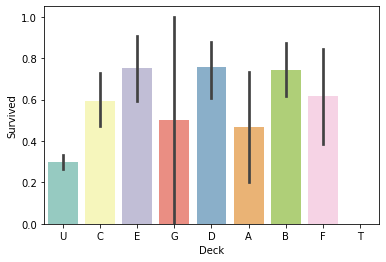

In [19]:
data['Cabin'] = data['Cabin'].fillna('Unknown')
data['Deck']=data['Cabin'].str.get(0)
sns.barplot(x="Deck", y="Survived", data=data, palette='Set3')

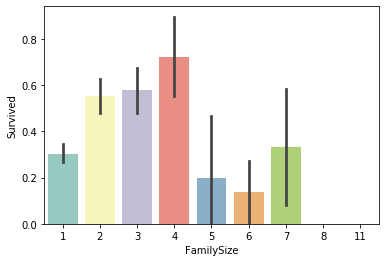

In [20]:
#family size
data["FamilySize"]=data["Parch"]+data["SibSp"]+1
sns.barplot(x="FamilySize", y="Survived", data=data, palette='Set3')

In [21]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_num,Deck,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Unknown,S,521171.0,U,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,17599.0,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,23101282.0,U,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,113803.0,C,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Unknown,S,373450.0,U,1


In [41]:
# model prediction
data=data[["Survived","Pclass","Sex","Age","Fare","FamilySize"]]
X= data.drop("Survived", axis=1)
y=data[["Survived"]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [42]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\trinity\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [44]:
y_pred = classifier.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm
print("The test score ",classifier.score(X_test,y_test))
print("The test score ",classifier.score(X_train,y_train))

The test score  0.8161434977578476
The test score  0.9640718562874252


In [45]:
pd.crosstab(data.Survived,data.Pclass)

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [46]:
data=data.drop(data.loc[:,['PassengerId','Name','Ticket','Cabin']], axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [47]:
data["Family"]=data["SibSp"]+data["Parch"]
data["Family"].head()

0    1
1    1
2    0
3    1
4    0
Name: Family, dtype: int64

In [48]:
data.groupby("Family").Survived.max()

Family
0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     0
10    0
Name: Survived, dtype: int64

In [49]:
data["Family"].max()

10

In [50]:
data=data[data["Age"].isna() == False]
data=data[data["Embarked"].isna() == False]

In [51]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [52]:
data=data.drop(data.loc[:,['SibSp','Parch']], axis=1)

In [53]:
#Male is 0 and female is 1
data.Sex= data.Sex.str.replace('male','0')
data.Sex= data.Sex.str.replace('fe0','1')
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,0,22.0,7.2500,S,1
1,1,1,1,38.0,71.2833,C,1
2,1,3,1,26.0,7.9250,S,0
3,1,1,1,35.0,53.1000,S,1
4,0,3,0,35.0,8.0500,S,0


In [54]:
data["Embarked"].value_counts(ascending=True)

Q     28
C    130
S    554
Name: Embarked, dtype: int64

In [55]:
#Q as 1, C as 2, S as 3
data.Embarked= data.Embarked.str.replace('Q','1')
data.Embarked= data.Embarked.str.replace('C','2')
data.Embarked= data.Embarked.str.replace('S','3')
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,0,22.0,7.2500,3,1
1,1,1,1,38.0,71.2833,2,1
2,1,3,1,26.0,7.9250,3,0
3,1,1,1,35.0,53.1000,3,1
4,0,3,0,35.0,8.0500,3,0


In [56]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Family      0
dtype: int64

In [57]:
data["Age"].min()

0.42

In [58]:
pd.crosstab(data.Age, data.Survived).head()

Survived,0,1
Age,,
0.42,0,1
0.67,0,1
0.75,0,2
0.83,0,2
0.92,0,1


In [59]:
data["Age"].max()

80.0

In [60]:
data["Age"].min()

0.42

In [61]:
data["Age"] = pd.to_numeric(data.Age, errors='coerce')

In [62]:
X= data.drop("Survived", axis=1)
y=data["Survived"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [63]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)


C:\Users\trinity\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
train_score =classifier.score(X_train,y_train)

In [65]:
print('Accuracy of train dataset: {:.2f}'.format(classifier.score(X_train, y_train)))

Accuracy of train dataset: 0.79


In [66]:
y_pred = classifier.predict(X_test)

In [67]:
print('Accuracy of test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of test set: 0.80


In [68]:
new_data= pd.read_csv("C:/Users/trinity/Downloads/titanic/test.csv")
new_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [69]:
new_data=new_data.drop(new_data.loc[:,['PassengerId','Name','Ticket','Cabin']], axis=1)
new_data["Family"]=new_data["SibSp"]+new_data["Parch"]
new_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,3,male,34.5,0,0,7.8292,Q,0
1,3,female,47.0,1,0,7.0000,S,1
2,2,male,62.0,0,0,9.6875,Q,0
3,3,male,27.0,0,0,8.6625,S,0
4,3,female,22.0,1,1,12.2875,S,2


In [70]:
new_data=new_data.drop(new_data.loc[:,['SibSp','Parch']], axis=1)

In [71]:
new_data.isnull().sum()

Pclass       0
Sex          0
Age         86
Fare         1
Embarked     0
Family       0
dtype: int64

In [72]:
new_data=new_data[new_data["Age"].isna() == False]
new_data=new_data[new_data["Fare"].isna() == False]

In [73]:
#Male is 0 and female is 1
new_data.Sex= new_data.Sex.str.replace('male','0')
new_data.Sex= new_data.Sex.str.replace('fe0','1')
new_data.head()

,Pclass,Sex,Age,Fare,Embarked,Family
0,3,0,34.5,7.8292,Q,0
1,3,1,47.0,7.0000,S,1
2,2,0,62.0,9.6875,Q,0
3,3,0,27.0,8.6625,S,0
4,3,1,22.0,12.2875,S,2


In [74]:
new_data["Embarked"].value_counts(ascending=True)

Q     22
C     82
S    227
Name: Embarked, dtype: int64

In [75]:
#Q as 1, C as 2, S as 3
new_data.Embarked= new_data.Embarked.str.replace('Q','1')
new_data.Embarked= new_data.Embarked.str.replace('C','2')
new_data.Embarked= new_data.Embarked.str.replace('S','3')
new_data.head()

,Pclass,Sex,Age,Fare,Embarked,Family
0,3,0,34.5,7.8292,1,0
1,3,1,47.0,7.0000,3,1
2,2,0,62.0,9.6875,1,0
3,3,0,27.0,8.6625,3,0
4,3,1,22.0,12.2875,3,2


In [76]:
newx= new_data
newy= classifier.predict(newx)

In [77]:
new_data['Survived']=newy
new_data.head()

,Pclass,Sex,Age,Fare,Embarked,Family,Survived
0,3,0,34.5,7.8292,1,0,0
1,3,1,47.0,7.0000,3,1,0
2,2,0,62.0,9.6875,1,0,0
3,3,0,27.0,8.6625,3,0,0
4,3,1,22.0,12.2875,3,2,1


In [80]:
new_data.groupby("Sex").Survived.count()

Sex
0    204
1    127
Name: Survived, dtype: int64

In [81]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
y_pred = regressor.predict(X_test)

In [84]:
from sklearn.metrics import r2_score
regressor.score(X_train,y_train)

0.39029635887288494

In [85]:
regressor.score(X_test,y_test)

0.41818834785451087

In [88]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [89]:
y_pred = classifier.predict(X_test)

In [91]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[70, 12],
       [18, 43]], dtype=int64)

In [92]:
print("Test Accuracy" ,classifier.score(X_test,y_test))
print("Train Accuracy",classifier.score(X_train,y_train))

Test Accuracy 0.7902097902097902
Train Accuracy 0.7768014059753954
